## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\gg\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
def build_mlp():
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [12]:
"""
Compile your model
"""
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
optimizer = keras.optimizers.sgd(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [14]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 13s 264us/step - loss: 2.2508 - acc: 0.1800 - val_loss: 2.1999 - val_acc: 0.2122
Epoch 2/500
50000/50000 [==============================] - 15s 294us/step - loss: 2.1699 - acc: 0.2247 - val_loss: 2.1408 - val_acc: 0.2432
Epoch 3/500
50000/50000 [==============================] - 13s 259us/step - loss: 2.1189 - acc: 0.2486 - val_loss: 2.0958 - val_acc: 0.2593- ETA: 0s - loss: 2.1197 - a
Epoch 4/500
50000/50000 [==============================] - 16s 322us/step - loss: 2.0785 - acc: 0.2631 - val_loss: 2.0598 - val_acc: 0.2691
Epoch 5/500
50000/50000 [==============================] - 15s 304us/step - loss: 2.0458 - acc: 0.2777 - val_loss: 2.0302 - val_acc: 0.2838
Epoch 6/500
50000/50000 [==============================] - 15s 305us/step - loss: 2.0183 - acc: 0.2880 - val_loss: 2.0053 - val_acc: 0.2965
Epoch 7/500
50000/50000 [==============================] - 15s 305us/step - loss: 

50000/50000 [==============================] - 17s 338us/step - loss: 1.6569 - acc: 0.4195 - val_loss: 1.6628 - val_acc: 0.4162
Epoch 59/500
50000/50000 [==============================] - 17s 339us/step - loss: 1.6541 - acc: 0.4200 - val_loss: 1.6584 - val_acc: 0.4219
Epoch 60/500
50000/50000 [==============================] - 17s 335us/step - loss: 1.6509 - acc: 0.4225 - val_loss: 1.6592 - val_acc: 0.4183
Epoch 61/500
50000/50000 [==============================] - 17s 338us/step - loss: 1.6478 - acc: 0.4227 - val_loss: 1.6553 - val_acc: 0.4208
Epoch 62/500
50000/50000 [==============================] - 16s 314us/step - loss: 1.6452 - acc: 0.4243 - val_loss: 1.6503 - val_acc: 0.4248
Epoch 63/500
50000/50000 [==============================] - 15s 306us/step - loss: 1.6422 - acc: 0.4245 - val_loss: 1.6536 - val_acc: 0.4186
Epoch 64/500
50000/50000 [==============================] - 15s 305us/step - loss: 1.6392 - acc: 0.4246 - val_loss: 1.6476 - val_acc: 0.4192
Epoch 65/500
50000/50000 [

50000/50000 [==============================] - 16s 329us/step - loss: 1.5201 - acc: 0.4669 - val_loss: 1.5435 - val_acc: 0.4567
Epoch 117/500
50000/50000 [==============================] - 17s 334us/step - loss: 1.5180 - acc: 0.4677 - val_loss: 1.5413 - val_acc: 0.4533
Epoch 118/500
50000/50000 [==============================] - 17s 339us/step - loss: 1.5163 - acc: 0.4689 - val_loss: 1.5394 - val_acc: 0.4561
Epoch 119/500
50000/50000 [==============================] - 17s 344us/step - loss: 1.5145 - acc: 0.4703 - val_loss: 1.5392 - val_acc: 0.4557
Epoch 120/500
50000/50000 [==============================] - 17s 341us/step - loss: 1.5126 - acc: 0.4701 - val_loss: 1.5370 - val_acc: 0.4546
Epoch 121/500
50000/50000 [==============================] - 17s 340us/step - loss: 1.5111 - acc: 0.4711 - val_loss: 1.5390 - val_acc: 0.4578
Epoch 122/500
50000/50000 [==============================] - 16s 320us/step - loss: 1.5089 - acc: 0.4702 - val_loss: 1.5345 - val_acc: 0.4564
Epoch 123/500
50000/

Epoch 174/500
50000/50000 [==============================] - 15s 294us/step - loss: 1.4231 - acc: 0.5018 - val_loss: 1.4798 - val_acc: 0.4723
Epoch 175/500
50000/50000 [==============================] - 15s 293us/step - loss: 1.4212 - acc: 0.5032 - val_loss: 1.4702 - val_acc: 0.4784
Epoch 176/500
50000/50000 [==============================] - 16s 321us/step - loss: 1.4200 - acc: 0.5039 - val_loss: 1.4739 - val_acc: 0.4769
Epoch 177/500
50000/50000 [==============================] - 16s 320us/step - loss: 1.4182 - acc: 0.5039 - val_loss: 1.4691 - val_acc: 0.4762
Epoch 178/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.4169 - acc: 0.5033 - val_loss: 1.4795 - val_acc: 0.4769
Epoch 179/500
50000/50000 [==============================] - 17s 332us/step - loss: 1.4156 - acc: 0.5034 - val_loss: 1.4687 - val_acc: 0.4793
Epoch 180/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.4138 - acc: 0.5051 - val_loss: 1.4670 - val_acc: 0.4763
Epoch 

50000/50000 [==============================] - 17s 333us/step - loss: 1.3417 - acc: 0.5314 - val_loss: 1.4239 - val_acc: 0.4908
Epoch 232/500
50000/50000 [==============================] - 16s 329us/step - loss: 1.3405 - acc: 0.5325 - val_loss: 1.4207 - val_acc: 0.4981
Epoch 233/500
50000/50000 [==============================] - 17s 340us/step - loss: 1.3388 - acc: 0.5323 - val_loss: 1.4184 - val_acc: 0.4962
Epoch 234/500
50000/50000 [==============================] - 16s 320us/step - loss: 1.3374 - acc: 0.5320 - val_loss: 1.4278 - val_acc: 0.4914
Epoch 235/500
50000/50000 [==============================] - 17s 331us/step - loss: 1.3370 - acc: 0.5331 - val_loss: 1.4230 - val_acc: 0.4954
Epoch 236/500
50000/50000 [==============================] - 16s 329us/step - loss: 1.3351 - acc: 0.5330 - val_loss: 1.4241 - val_acc: 0.4949
Epoch 237/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.3337 - acc: 0.5343 - val_loss: 1.4290 - val_acc: 0.4876
Epoch 238/500
50000/

50000/50000 [==============================] - 12s 239us/step - loss: 1.2708 - acc: 0.5576 - val_loss: 1.3851 - val_acc: 0.5115
Epoch 289/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.2689 - acc: 0.5565 - val_loss: 1.3861 - val_acc: 0.5080
Epoch 290/500
50000/50000 [==============================] - 11s 223us/step - loss: 1.2683 - acc: 0.5574 - val_loss: 1.3919 - val_acc: 0.5023
Epoch 291/500
50000/50000 [==============================] - 11s 224us/step - loss: 1.2675 - acc: 0.5574 - val_loss: 1.3803 - val_acc: 0.5084
Epoch 292/500
50000/50000 [==============================] - 11s 223us/step - loss: 1.2663 - acc: 0.5575 - val_loss: 1.3891 - val_acc: 0.5054
Epoch 293/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.2652 - acc: 0.5589 - val_loss: 1.4109 - val_acc: 0.4999
Epoch 294/500
50000/50000 [==============================] - 11s 223us/step - loss: 1.2644 - acc: 0.5588 - val_loss: 1.3880 - val_acc: 0.5086
Epoch 295/500
50000/

50000/50000 [==============================] - 13s 258us/step - loss: 1.2067 - acc: 0.5799 - val_loss: 1.3584 - val_acc: 0.5188
Epoch 346/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.2047 - acc: 0.5792 - val_loss: 1.3777 - val_acc: 0.5114
Epoch 347/500
50000/50000 [==============================] - 13s 261us/step - loss: 1.2034 - acc: 0.5814 - val_loss: 1.3672 - val_acc: 0.5172
Epoch 348/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.2035 - acc: 0.5808 - val_loss: 1.3698 - val_acc: 0.5148
Epoch 349/500
50000/50000 [==============================] - 12s 244us/step - loss: 1.2015 - acc: 0.5814 - val_loss: 1.3654 - val_acc: 0.5141
Epoch 350/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.2018 - acc: 0.5802 - val_loss: 1.3619 - val_acc: 0.5179
Epoch 351/500
50000/50000 [==============================] - 11s 225us/step - loss: 1.1998 - acc: 0.5822 - val_loss: 1.3645 - val_acc: 0.5170
Epoch 352/500
50000/

Epoch 403/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.1452 - acc: 0.6023 - val_loss: 1.3477 - val_acc: 0.5271
Epoch 404/500
50000/50000 [==============================] - 12s 230us/step - loss: 1.1451 - acc: 0.6009 - val_loss: 1.3907 - val_acc: 0.5143
Epoch 405/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.1433 - acc: 0.5997 - val_loss: 1.3673 - val_acc: 0.5199
Epoch 406/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.1422 - acc: 0.6023 - val_loss: 1.3459 - val_acc: 0.5219
Epoch 407/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.1407 - acc: 0.6025 - val_loss: 1.3430 - val_acc: 0.5277
Epoch 408/500
50000/50000 [==============================] - 12s 230us/step - loss: 1.1401 - acc: 0.6030 - val_loss: 1.3532 - val_acc: 0.5251
Epoch 409/500
50000/50000 [==============================] - 12s 230us/step - loss: 1.1392 - acc: 0.6028 - val_loss: 1.4002 - val_acc: 0.5086
Epoch 

Epoch 461/500
50000/50000 [==============================] - 11s 223us/step - loss: 1.0833 - acc: 0.6231 - val_loss: 1.3254 - val_acc: 0.5378
Epoch 462/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.0837 - acc: 0.6224 - val_loss: 1.3514 - val_acc: 0.5243
Epoch 463/500
50000/50000 [==============================] - 11s 223us/step - loss: 1.0830 - acc: 0.6233 - val_loss: 1.3486 - val_acc: 0.5310
Epoch 464/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.0825 - acc: 0.6231 - val_loss: 1.3499 - val_acc: 0.5247
Epoch 465/500
50000/50000 [==============================] - 11s 224us/step - loss: 1.0811 - acc: 0.6234 - val_loss: 1.3467 - val_acc: 0.5276
Epoch 466/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.0794 - acc: 0.6252 - val_loss: 1.3350 - val_acc: 0.5296
Epoch 467/500
50000/50000 [==============================] - 11s 223us/step - loss: 1.0796 - acc: 0.6247 - val_loss: 1.3526 - val_acc: 0.5243
Epoch 

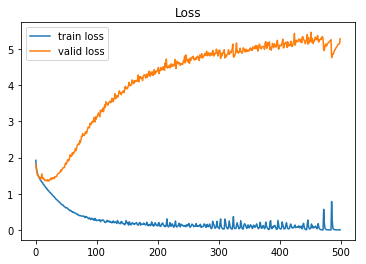

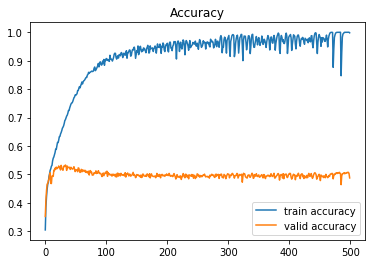

In [10]:
#epoch = 500

import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

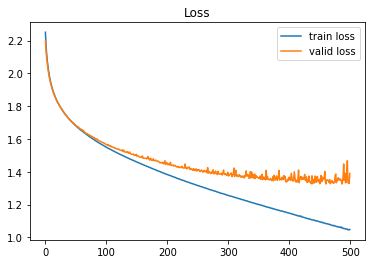

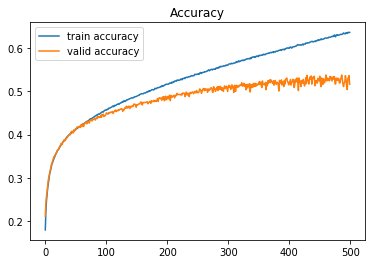

In [15]:
#Optimizer 換成 SGD

import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()